In [69]:
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from matplotlib import pyplot
import numpy as np
import os
%matplotlib inline

In [88]:
INCLUDE_DIR = '../data/EFOSC/20151004_test/include_flat_feature_in_fit/'
EXCLUDE_DIR = '../data/EFOSC/20151004_test/exclude_flat_feature_in_fit/'
FIG_DIR = '../figures'

# 1D SN Spectrum

In [89]:
filename = 'tASASSN-15oz_20151003_Gr13_Free_slit1.0_57678_1_e.fits'

In [90]:
include_data = fits.open(os.path.join(INCLUDE_DIR, filename))
exclude_data = fits.open(os.path.join(EXCLUDE_DIR, filename))

In [91]:
def calc_wavelength(header, pixels):
    assert header['CTYPE1'] == 'LINEAR'
    CRVAL1 = header['CRVAL1']
    CRPIX1 = header['CRPIX1']
    CD1_1 = header['CD1_1']
    
    wavelength = CRVAL1 + CD1_1*(pixels - CRPIX1)
    return wavelength

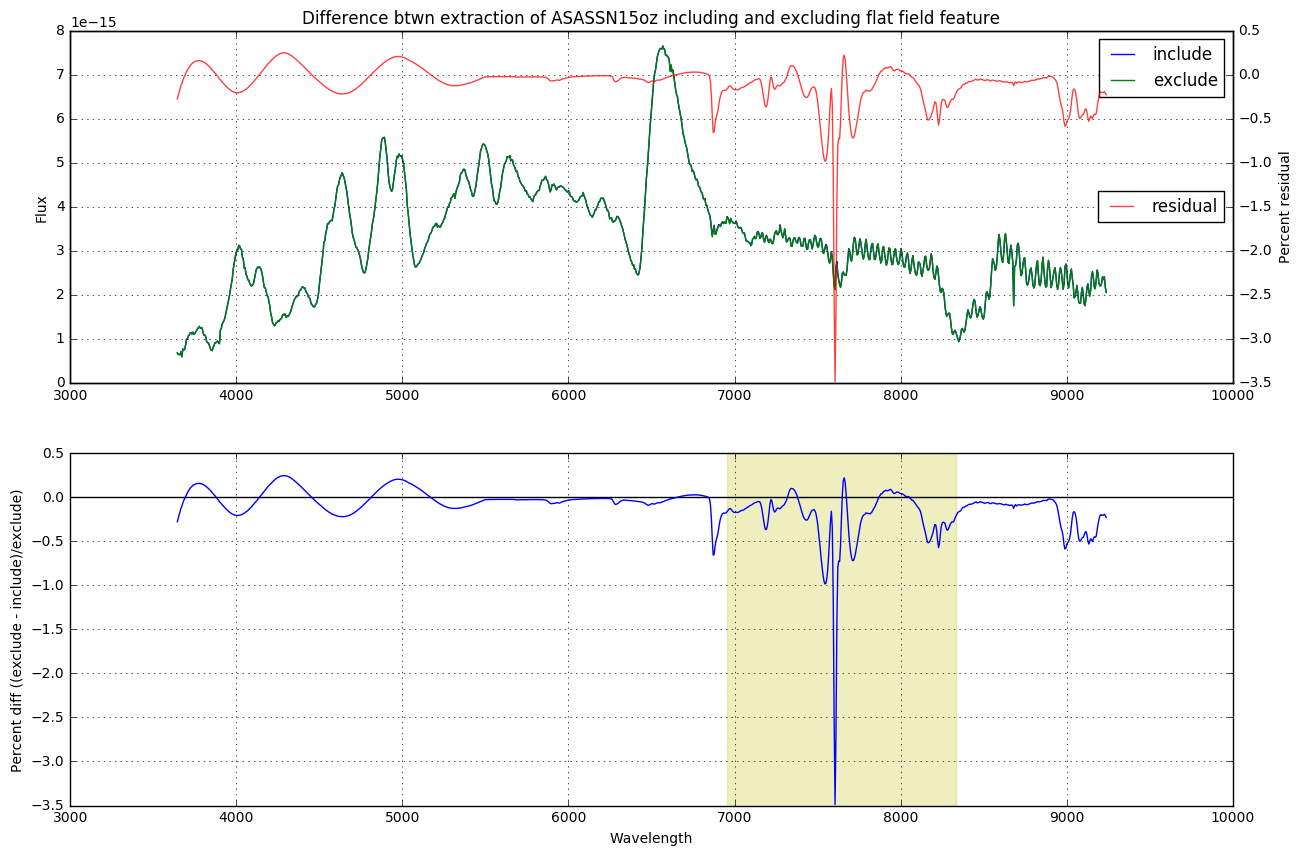

In [95]:
fig = pyplot.figure(figsize = [15, 10])
ax_spec = fig.add_subplot(2,1,1)
ax_resid = fig.add_subplot(2,1,2)
pixels = np.arange(1, 1016) #iraf pixel numbering starts with 1 not 0
include_wl = calc_wavelength(include_data[0].header, pixels)
exclude_wl = calc_wavelength(exclude_data[0].header, pixels)
include_flux = include_data[0].data[0,0, :]
exclude_flux = exclude_data[0].data[0, 0, :]
ax_spec.plot(include_wl, include_flux, label = 'include')
ax_spec.plot(exclude_wl, exclude_flux, label = 'exclude')
ax_spec.legend(loc = 'best')
ax_resid.axvspan(include_wl[600], include_wl[850], color = 'y', alpha = 0.25, label = 'pixels 600-850')
ax_resid.axhline(0, color = 'k')
include_interp = np.interp(exclude_wl, include_wl, include_flux)
ax_resid.plot(exclude_wl, (exclude_flux - include_interp)/exclude_flux*100.)
ax_resid.set_ylabel('Percent diff ((exclude - include)/exclude)')
ax_spec.set_ylabel('Flux')
ax_resid.set_xlabel('Wavelength')
ax_spec.set_title('Difference btwn extraction of ASASSN15oz including and excluding flat field feature')
ax_resid2 = ax_spec.twinx()
ax_resid2.plot(exclude_wl, (exclude_flux - include_interp)/exclude_flux*100., color = 'r', label = 'residual', alpha = 0.75)
ax_resid2.legend(loc = 5)
ax_resid2.set_ylabel('Percent residual')
ax_spec.grid()
ax_resid.grid()
pyplot.savefig(os.path.join(FIG_DIR, 'comp_15oz_extracted_spec_diff_flat.pdf'))

# Normalized Flat

In [82]:
filename = 'nflat_20151003_Gr13_Free_slit1.0_100378937_57678.fits'
include_ofile = fits.open(os.path.join(INCLUDE_DIR, filename))
exclude_ofile = fits.open(os.path.join(EXCLUDE_DIR, filename))

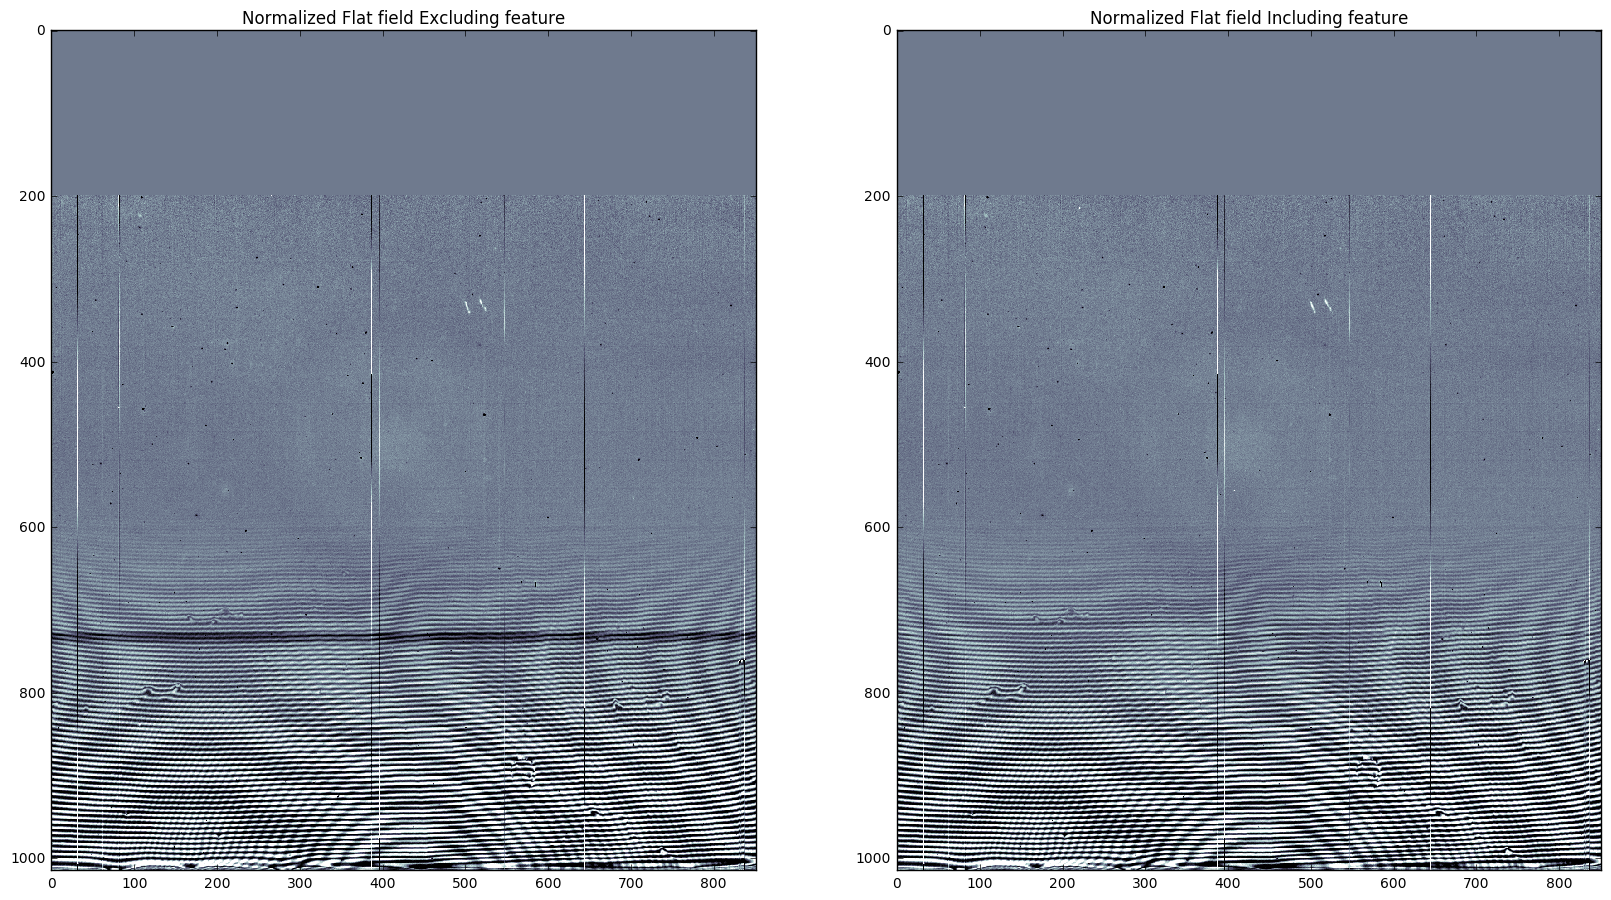

In [85]:
fig = pyplot.figure(figsize=[20, 15])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
zscale= ZScaleInterval()
vmin, vmax = zscale.get_limits(exclude_ofile[0].data.flatten())
ax1.imshow(exclude_ofile[0].data, interpolation = 'nearest', cmap = 'bone', vmin = vmin, vmax = vmax)
ax2.imshow(include_ofile[0].data, interpolation = 'nearest', cmap = 'bone', vmin = vmin, vmax = vmax)
ax1.set_title('Normalized Flat field Excluding feature')
ax2.set_title('Normalized Flat field Including feature')
pyplot.savefig(os.path.join(FIG_DIR, 'nflat_20151003_Gr13_Free_slit1.0_100378937.pdf'))

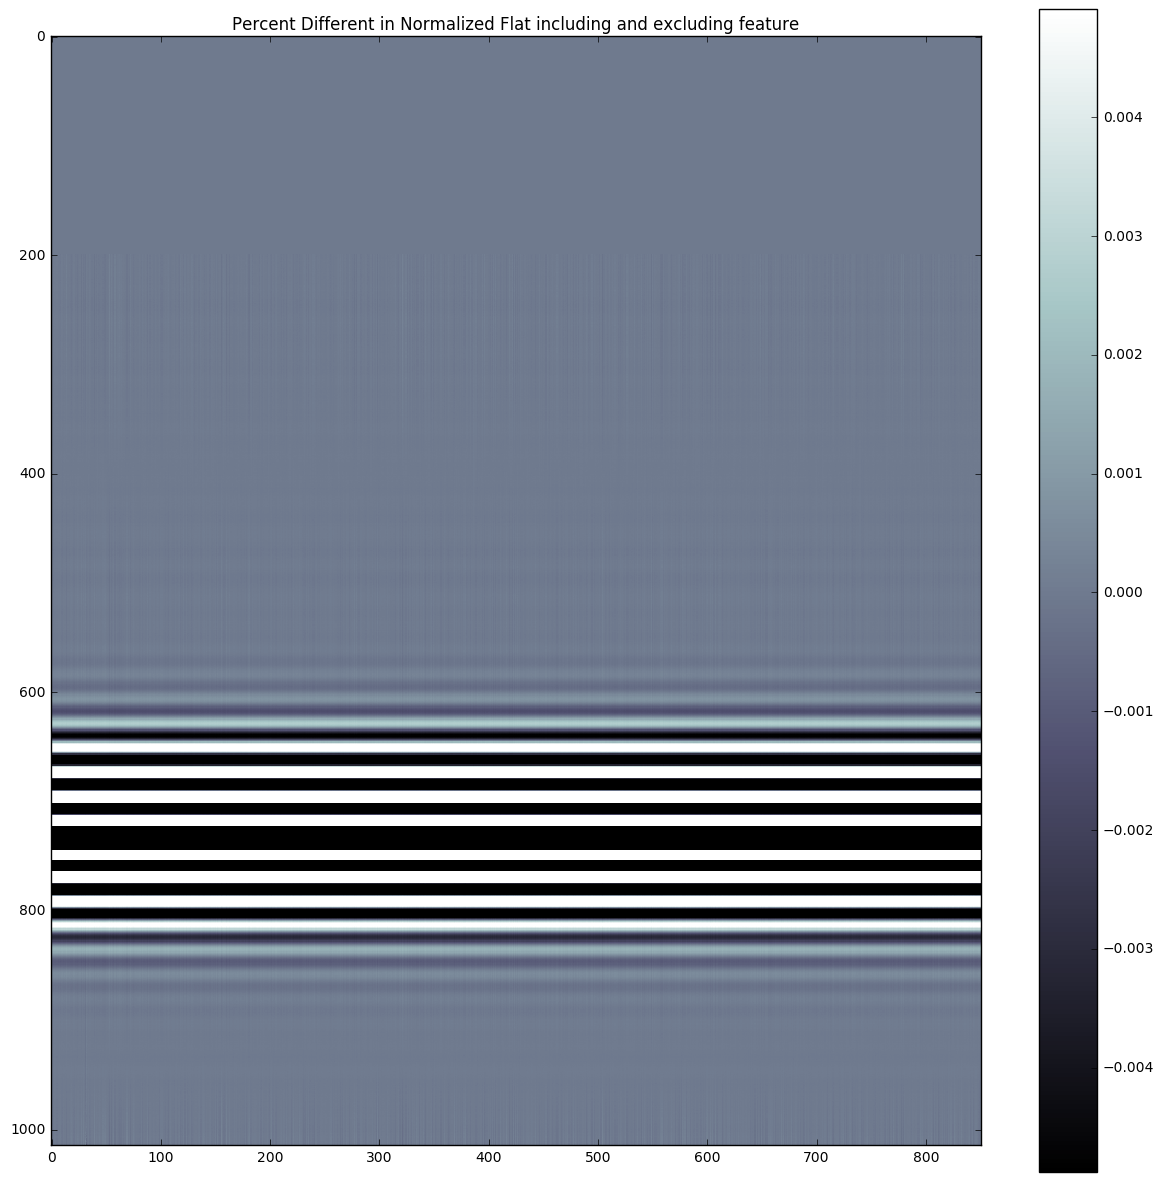

In [84]:
perc_diff = (exclude_ofile[0].data - include_ofile[0].data)/exclude_ofile[0].data*100.
vmin, vmax = zscale.get_limits(perc_diff.flatten())
fig = pyplot.figure(figsize = [15, 15])
ax = fig.add_subplot(1,1,1)
im = ax.imshow(perc_diff, interpolation = 'nearest', cmap = 'bone', vmin = vmin, vmax = vmax)
fig.colorbar(im)
ax.set_title('Percent Different in Normalized Flat including and excluding feature')
pyplot.savefig(os.path.join(FIG_DIR, 'percent_diff_nflat.pdf'))